# Compilation de statistiques sur des phénomènes de la société marocaine

* Recensement de certaines particularités sociale, économique, éducationnelle sur la vie marocaine pour une meilleure compréhension des contextes historiques et sociaux en se basant sur des chiffres et des évènements.
* Utilisation de l'outil Pandas pour exercise du traitement des données

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

**Fonction générale pour extraire le tableau d'un pays selon le nom : **

In [59]:
""" Fonction pour extraire un pays en dataframe selon le nom """
def choisir_pays(x,f):
    """ x : nom du pays
        frame : le data frame cible
    """
    d = f[f['Country Name'] == x]
    #retirer les colonnes inutiles
    d.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
    dt = d.transpose()
    print(dt.head())
    
    #supprimer les Nan
    dt.dropna(inplace=True)
    #actualiser les index
    dt.reset_index(inplace=True)
    
    #renommer les colonnes
    dt.rename(columns={'index':'year',dt.columns.values[1]:'rate %'},inplace=True)
    return dt

## source des données  : "https://donnees.banquemondiale.org/indicateur/SE.PRM.ENRR?end=2016&locations=MA&start=2016&view=bar"

In [4]:
df = pd.read_csv('inscription_primaire.csv')

In [24]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Inscriptions à l’école, primaire (% brut)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,113.801788,113.794296,105.255859,104.087128,116.039299,117.108093,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Inscriptions à l’école, primaire (% brut)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,99.163681,102.163849,99.371521,105.094978,105.983871,107.367928,107.225357,NaN,104.610703,NaN
2,Angola,AGO,"Inscriptions à l’école, primaire (% brut)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,103.427933,105.054588,118.651787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albanie,ALB,"Inscriptions à l’école, primaire (% brut)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,93.506477,93.835472,95.220428,98.602219,102.268028,107.672760,109.762444,109.777412,NaN,NaN
4,Andorre,AND,"Inscriptions à l’école, primaire (% brut)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Traitement du tableu pour extraire les données relatives au maroc et les convertir en dataframe

In [6]:
pays = df[df['Country Name'] == 'Maroc']

In [7]:
pays

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
146,Maroc,MAR,"Inscriptions à l’école, primaire (% brut)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,107.090752,109.561859,110.510193,110.441467,110.010437,109.675667,109.296822,110.258347,NaN,NaN


In [8]:
pays.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)

c:\users\marwane\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
maroc = pays.transpose()

In [10]:
maroc.head()

,146
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN


In [11]:
#ajouter un index 
maroc.reset_index(inplace=True)

In [12]:
# Retirer les NaN
maroc.dropna(inplace=True)

In [13]:
maroc.head()

,index,146
11,1971,48.586029
12,1972,49.776878
13,1973,50.463440
14,1974,51.968170
15,1975,54.185799


In [14]:
#renommer les colonnes
maroc.rename(columns={'index':'year',146:'rate %'},inplace=True)

In [15]:
maroc.head()

,year,rate %
11,1971,48.586029
12,1972,49.776878
13,1973,50.463440
14,1974,51.968170
15,1975,54.185799


** évolution du taux d'inscription des élèves marocains au primaire de 1970 à 2016'** (données banque modiale 

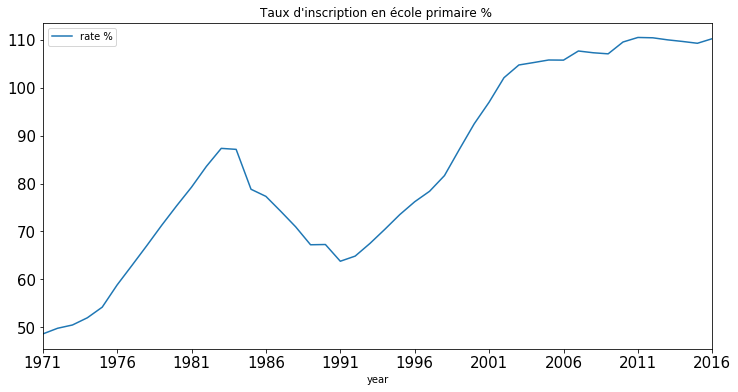

In [16]:
maroc.plot.line(x='year',figsize=(12,6),fontsize=15,title="Taux d'inscription en école primaire % ")

On remarque une dégringolade du pourcentage des inscriptions en école primaire entre la période de 1983 à 1991.
Quels seraient les éléments constitutifs de ce déclin ? comparons avec les faits historiques majeurs des années 83 - 84 :

    1983 :
* cessation de paiement du maroc
* augmentation du prix de la nourriture
* hausse des frais scolaires
* révolte à marrakech et dans le nord
* plan d'austérité

biblio : "http://perspective.usherbrooke.ca/bilan/servlet/BMEve?codeEve=931"

In [60]:
tunisie = choisir_pays('Tunisie',df)

      241
1960  NaN
1961  NaN
1962  NaN
1963  NaN
1964  NaN


c:\users\marwane\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
tunisie.head()

,year,rate %
0,1971,103.507629
1,1972,102.455353
2,1973,95.365311
3,1974,92.394318
4,1975,95.064148


In [54]:
tunisie.columns.values[1]

241